# <center> Sur-apprentissage : le piège du Deep Learning <center>

**Source :** Cours de Franck Bardol, [LinkedIn Learning](https://www.linkedin.com/learning/decouvrir-le-deep-learning-avec-keras/bienvenue-dans-le-deep-learning-avec-keras?autoplay=true).

L'objectif de ce notebook est :
* de comprendre quel est le piège principal du Deep Learning ?
* comment le décrire simplement ?
* comment le détecter ?
* comment l'éviter

## Comprendre le sur-apprentissage

L'objet de l'algorithme de Deep Learning est d'apprendre un concept à partir des données afin de pouvoir appliquer ce concept par ailleurs. Apprendre pour généraliser.

Le sur-apprentissage (*over-fitting*) est le symptôme d'un modèle de Deep Learning qui n'apprend pas correctement.

On peut comparer un modèle de Deep Learning victime de sur-apprentissage à un élève qui apprend une leçon par coeur sans comprendre les concepts importants.
Dans ce cas, lorsqu'on change *un peu* l'énoncé, l'élève qui sur-apprend ne peut plus répondre correctement.

Le sur-apprentissage survient lorsque l'algorithme d'apprentissage 
* retient les détails du bruit statistique des données 
* n'extrait pas le concept **général**

## Décrire le sur-apprentissage

En Machine Learning et en Deep Learning, le sur-apprentissage survient lorsque le modèle est trop complexe pour le problème considéré.

Un problème simple nécessitte une solution qui l'est également
### Un exemple de sur-apprentissage en classification
Prenons l'exemple d'un classificateur . C'est-à-dire un modèle chargé d'effectuer une classification. Le classificateur doit attribuer une classe, un label à chaque instance.

En général, le modèle de classification doit apprendre à distinguer entre, au moins, deux classes. 
Par exemple, apprendre ce qui distingue les *bons* client des *mauvais*.

Une fois, que le modèle est entrainé sur les exemples d'apprentissage. 
On lui montre des nouveaux exemples qu'il ne connaît pas et il doit classer les nouveaux exemples dans les bonnes classes. Il doit attribuer les bonnes étiquettes.


In [ ]:
from google.colab import files
dataset = files.upload()

Saving 02-03-00.png to 02-03-00.png
Saving 02-03-01.png to 02-03-01.png


In [ ]:
!ls

'_02-03-00 (1).png'   _02-03-00.png   sample_data


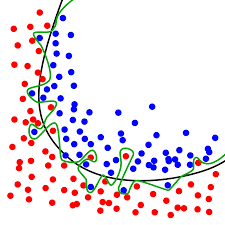

In [ ]:
#@title Default title text
from IPython.display import Image
Image(filename = '02-03-00.png')

Sur cette figure, on voit la réponse de 2 classificateurs.

Ici, le classificateur doit  apprendre à distinguer les ronds bleus des ronds rouges en fonction de leur attributs.

Après l'apprentissage, chaque classificateur trace une frontière de décision qui sépare les instances d'apprentissage rouges des bleues.
C'est cette frontière qui sera reprise pour séparer les nouveaux points non vus durant l'apprentissage.

La frontière verte épouse *tous* les contours. Elle correspond à un % d'erreur **d'apprentissage** qui est nul. Avec la frontière verte, tous les points d'apprentissage sont bien classés. 



## Comment détecter le sur-apprentissage ?


Par contre, cette frontière de décision chahutée conduira à mal classer beaucoup d'instances lors de la phase de test. 
En effet, ces nouveaux points de test seront toujours un peu différents de ceux vu lors de la phase d'apprentissage.

Ici la détection du sur-apprentissage est aisée :
* phase d'apprentissage : **100 % ou presque **des instances sont bien classées
* phase de test : le % de bonne classification est très mauvais. En tout cas, sensiblement inférieur à celui observé durant la phase d'apprentissage 

C'est l'écart entre la performance en entrainement (phase d'apprentissage) et celle en phase de test qui nous indique le présence de sur-apprentissage  

## Comment éviter le sur-apprentissage ?

### Early stopping
C'est une des méthodes les plus classiques du Deep Learning.
*Early stopping* signifie arrêt prématuré.  Cette méthode consiste à **interrompre** au bon moment  l'apprentissage 

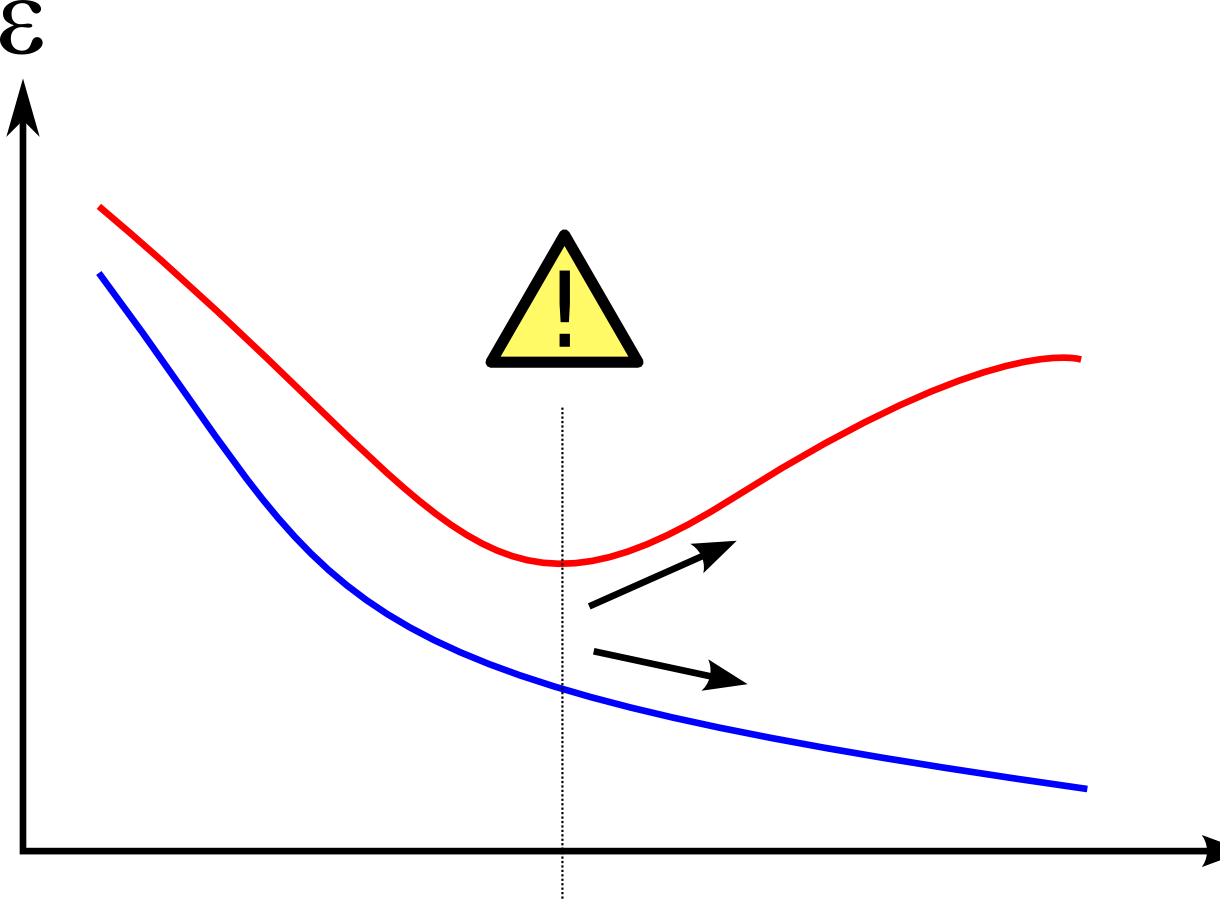

In [ ]:
#@title Default title text
from IPython.display import Image
Image(filename = '02-03-01.png' , width = 300, height = 300)

Sur la figure, les itérations de l'algorithme  en horizontal, l'erreur en vertical.
La courbe bleue pour l'ensemble d'apprentissage, la rouge pour l'ensemble de test.

De gauche à droite. Au début, il y a eu peu d'itérations, l'algorithme n'a pas trouvé les "bons" réglages. Il fait beaucoup d'erreur, aussi bien sur l'ensemble de test que sur l'ensemble d'apprentissage. Les courbes d'erreur bleues et rouges sont hautes.

Ensuite, les courbes d'erreurs diminuent **conjointement** jusqu'à un point d'inflexion marqué par le signe ! sur le graphique.

**C'est à cet instant qu'il faut stopper les itérations et interrompre l'apprentissage**.
C'est le point où l'erreur (mesurée sur l'ensemble de test) est la **plus faible**.

Le **sur-apprentissage** apparaît lorsqu'on poursuit l'apprentissage **au-delà** de ce point.
En effet, la courbe d'erreur d'apprentissage (bleue) devient de plus en plus faible jusqu'à devenir nulle. Le modèle sur-apprend. Ça correspond alors à l'exemple qu'on a vu en classification où le modèle ne faisait plus aucune erreur d'apprentissage !
Par contre, les erreurs sont très nombreuses sur le jeu de test. La courbe rouge, tout à droite, est élevée. 


### Early avec Keras
Keras permet très simplement d'implémenter l'early stopping

In [ ]:
from keras.callbacks import EarlyStopping

# demande de surveiller l'erreur (loss) de validation (jeu de test)
# patience : la décroissance n'est pas régulière. Eviter de stopper sur une fluctuation
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# la call back est utilisee lors de l'apprentissage : 
history = model.fit(callbacks=[early_stopping])


Un exemple complet à présent :

In [ ]:
from keras import layers
from keras import models
from keras import optimizers 
from keras.callbacks import EarlyStopping


from sklearn import model_selection
from sklearn.datasets import make_classification

import matplotlib.pyplot as pl
import numpy as np

X,y = make_classification(n_samples = 300, 
                          n_features = 20, 
                          n_informative = 2, 
                          n_classes = 2)

model = models.Sequential()
model.add(layers.Dense(32 , input_dim = X.shape[1]))
model.add(layers.Dense(64,kernel_initializer= 'normal' , activation= 'sigmoid' ))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X, 
          y, 
          epochs= 40, 
          batch_size = 5,
          validation_split = 0.33,
          callbacks=[early_stopping],
          verbose = 0)

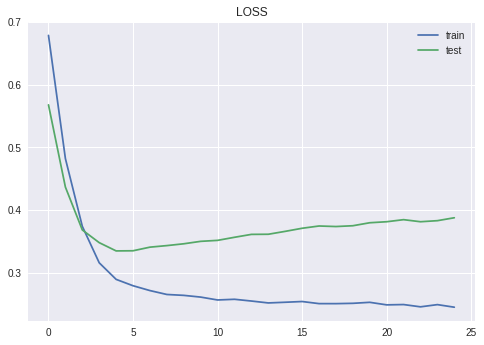

In [ ]:
pl.figure()
pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])
pl.title('LOSS')
pl.legend([ 'train' ,  'test' ], loc= 'best' )
pl.show()